In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = "data.csv"
df = pd.read_csv(file_path)


In [3]:
print("Dataset shape:", df.shape)
print("Dataset info:")
print(df.info())

Dataset shape: (4733, 785)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4733 entries, 0 to 4732
Columns: 785 entries, label to pixel784
dtypes: float64(773), int64(12)
memory usage: 28.3 MB
None


In [15]:
labels = df.iloc[:, 0].values
pixels = df.iloc[:, 1:].values  # Fix the error by removing `.to_numpy()`
images = pixels.reshape(-1, 28, 28)  # Adjust dimensions as per dataset


In [16]:
print("\nSummary statistics of pixel values:")
print(df.iloc[:, 1:].describe())


Summary statistics of pixel values:
            pixel1       pixel2       pixel3       pixel4       pixel5  \
count  4733.000000  4733.000000  4733.000000  4733.000000  4733.000000   
mean      0.002958     0.005916     0.023875     0.098246     0.176843   
std       0.203498     0.180304     0.263399     1.851373     2.672730   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max      14.000000    10.000000    10.000000    87.000000    88.000000   

            pixel6       pixel7       pixel8       pixel9      pixel10  ...  \
count  4733.000000  4733.000000  4733.000000  4733.000000  4733.000000  ...   
mean      0.391506     0.800549     2.194169     5.583351    14.266638  ...   
std       5.637723     7.879585    14.076327    23.692220  

<ipython-input-17-8811e9b5491e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


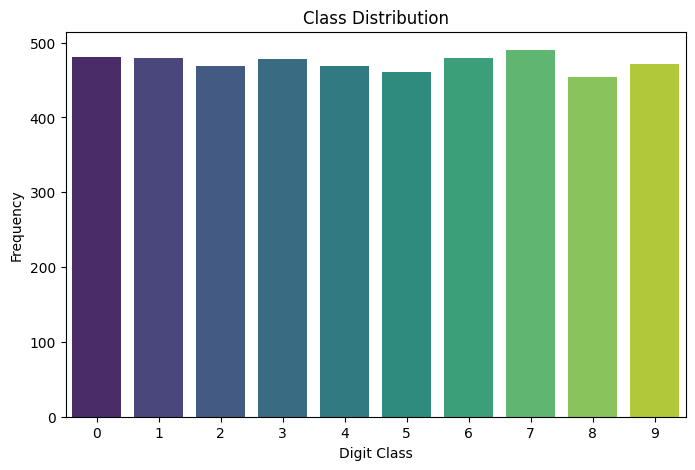

In [17]:
label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.xlabel("Digit Class")
plt.ylabel("Frequency")
plt.title("Class Distribution")
plt.show()

In [18]:
image_size = int(np.sqrt(pixels.shape[1]))  # Infer image size (28x28)
images = pixels.reshape(-1, image_size, image_size)

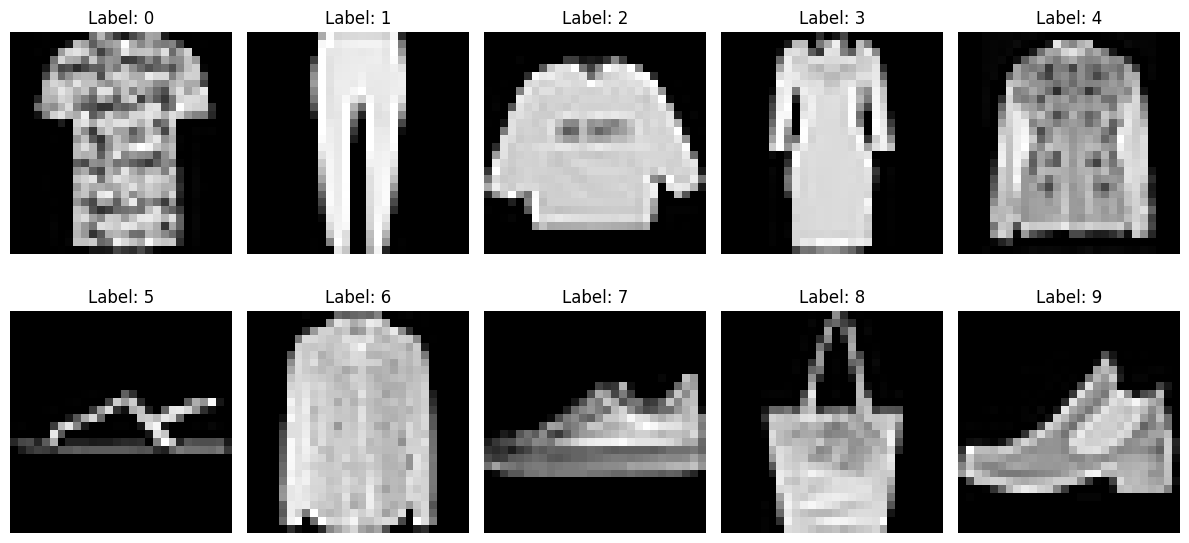

In [31]:
unique_labels = np.unique(labels)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()
for i, label in enumerate(unique_labels[:10]):
    idx = np.where(labels == label)[0][0]
    image = images[idx]

    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()